<a href="https://colab.research.google.com/github/teenwolf395/L4/blob/main/L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install kaggle
!pip install catboost

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

from google.colab import files
import os
import shutil

# Шаг 1: Загружаем kaggle.json
print("Пожалуйста, загрузите файл kaggle.json:")
uploaded = files.upload()

# Проверяем, что файл загружен
if 'kaggle.json' not in uploaded:
    print("Ошибка: файл kaggle.json не найден среди загруженных файлов")
else:
    print("Файл kaggle.json успешно загружен")

    # Шаг 2: Настраиваем Kaggle API
    source_path = 'kaggle.json'
    destination_dir = os.path.expanduser('~/.kaggle')
    destination_path = os.path.join(destination_dir, 'kaggle.json')

    # Создаем директорию, если не существует
    os.makedirs(destination_dir, exist_ok=True)

    # Перемещаем файл
    shutil.move(source_path, destination_path)

    # Устанавливаем правильные права доступа
    os.chmod(destination_path, 0o600)

    print("Kaggle API настроен успешно")

    # Шаг 3: Скачиваем датасет
    print("Скачиваем датасет")
    !kaggle datasets download -d atharvasoundankar/global-cybersecurity-threats-2015-2024

    # Шаг 4: Распаковываем
    import zipfile
    with zipfile.ZipFile('global-cybersecurity-threats-2015-2024.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

    print("Датасет готов к использованию!")

Пожалуйста, загрузите файл kaggle.json:


Saving kaggle.json to kaggle.json
Файл kaggle.json успешно загружен
Kaggle API настроен успешно
Скачиваем датасет
Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
License(s): CC0-1.0
global-cybersecurity-threats-2015-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Датасет готов к использованию!


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

#import warnings
#удалить скорее всего. игнорирует ошибки
#warnings.filterwarnings('ignore')

threats = pd.DataFrame()
try:
    if os.path.getsize('Global_Cybersecurity_Threats_2015-2024.csv') > 0:
      threats = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
      type(threats)
      print('Файл проимпортирован\n')
    else:
      print('Файл пустой')
except OSError as e:
    print('Файла не существует')

Файл проимпортирован



In [33]:
print(threats.isnull().sum())

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [34]:
threats.describe(include = "all")

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000.000000
unique,10,NaN,6,7,NaN,NaN,4,4,5,NaN
top,UK,NaN,DDoS,IT,NaN,NaN,Nation-state,Zero-day,Antivirus,NaN
freq,321,NaN,531,478,NaN,NaN,794,785,628,NaN
mean,NaN,2019.570333,NaN,NaN,50.492970,504684.136333,NaN,NaN,NaN,36.476000
std,NaN,2.857932,NaN,NaN,28.791415,289944.084972,NaN,NaN,NaN,20.570768
min,NaN,2015.000000,NaN,NaN,0.500000,424.000000,NaN,NaN,NaN,1.000000
25%,NaN,2017.000000,NaN,NaN,25.757500,255805.250000,NaN,NaN,NaN,19.000000
50%,NaN,2020.000000,NaN,NaN,50.795000,504513.000000,NaN,NaN,NaN,37.000000
75%,NaN,2022.000000,NaN,NaN,75.630000,758088.500000,NaN,NaN,NaN,55.000000


АНАЛИЗ ДАННЫХ КИБЕРАТАК
Размер датасета: (3000, 10)

Первые 5 строк:
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1      

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



CatBoost Результаты:
  MAE: $26.70M
  RMSE: $31.44M
  R²: -0.2222
  MAPE: 175.98%
✅ CatBoost успешно обучена

✅ Успешно обучено моделей: 5 из 5

СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ

Сравнительная таблица метрик:
                       MAE     RMSE      R2      MAPE
Gradient Boosting  27.2937  32.5173 -0.3076  184.8637
XGBoost            27.4085  32.4730 -0.3040  179.8857
Random Forest      26.5001  31.0027 -0.1886  174.2257
LightGBM           27.1683  32.1615 -0.2791  171.7796
CatBoost           26.7022  31.4372 -0.2222  175.9842

🏆 ЛУЧШАЯ МОДЕЛЬ: Random Forest
R²: -0.1886
MAE: $26.50M
RMSE: $31.00M
MAPE: 174.23%

Визуализация результатов...


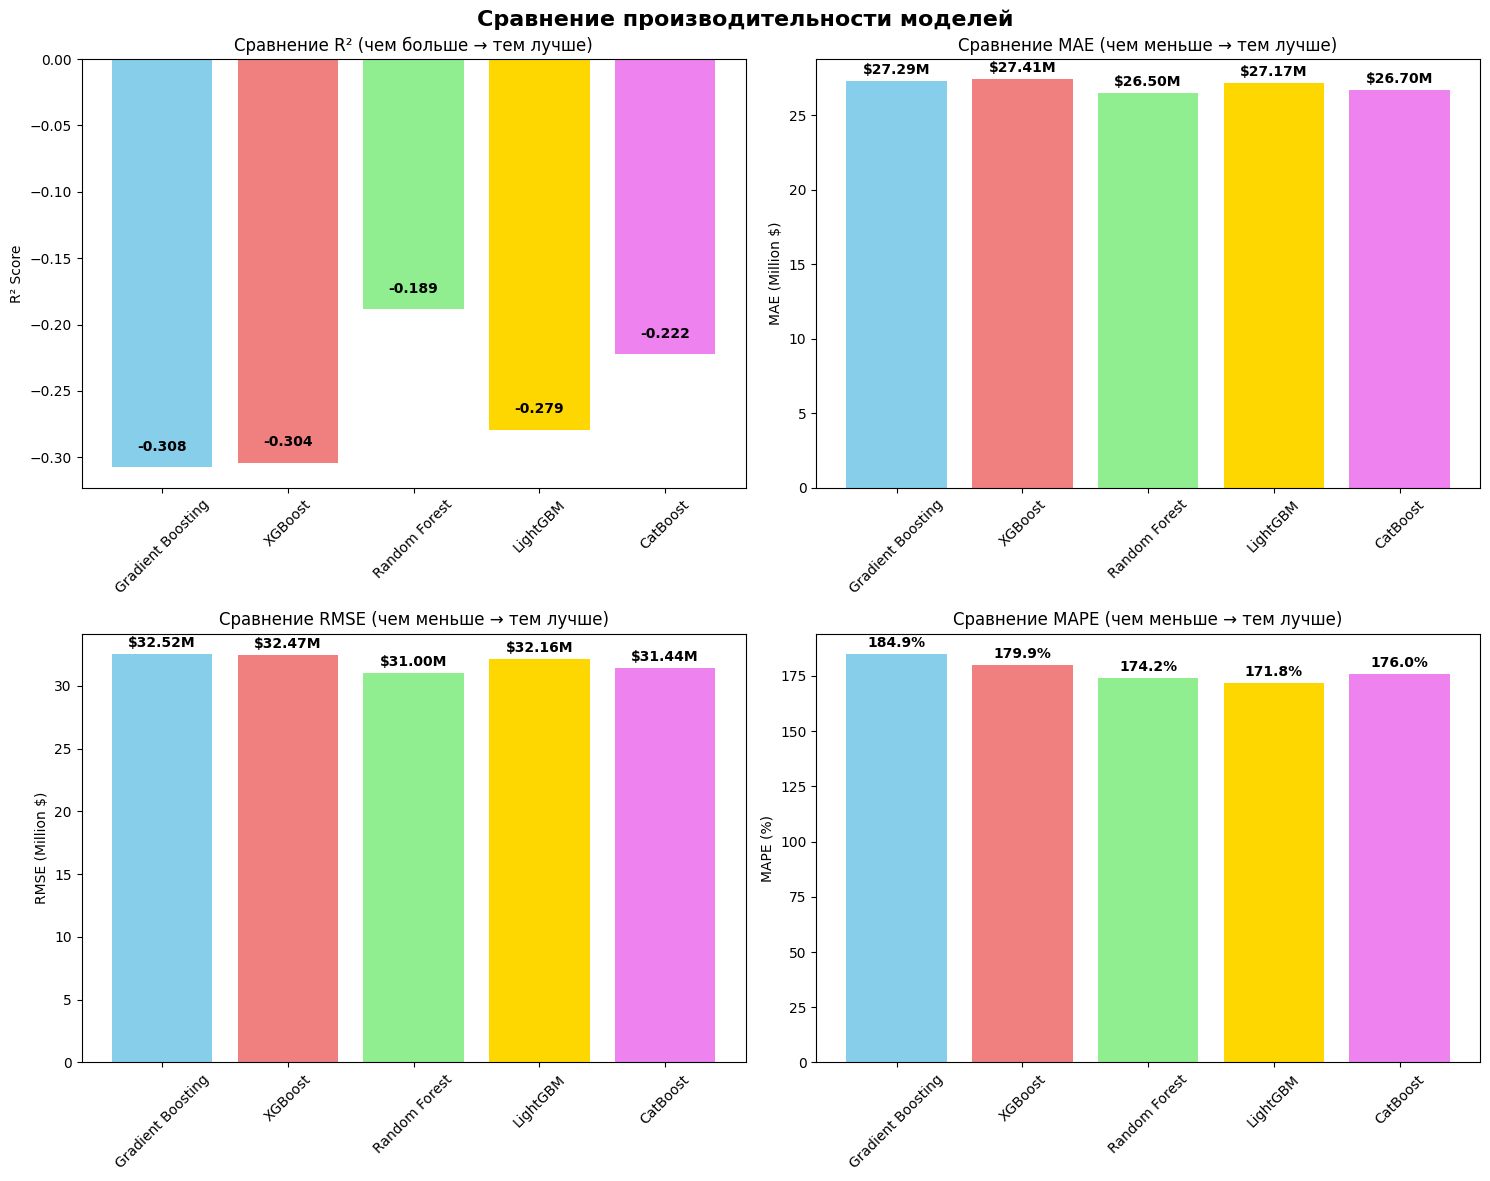

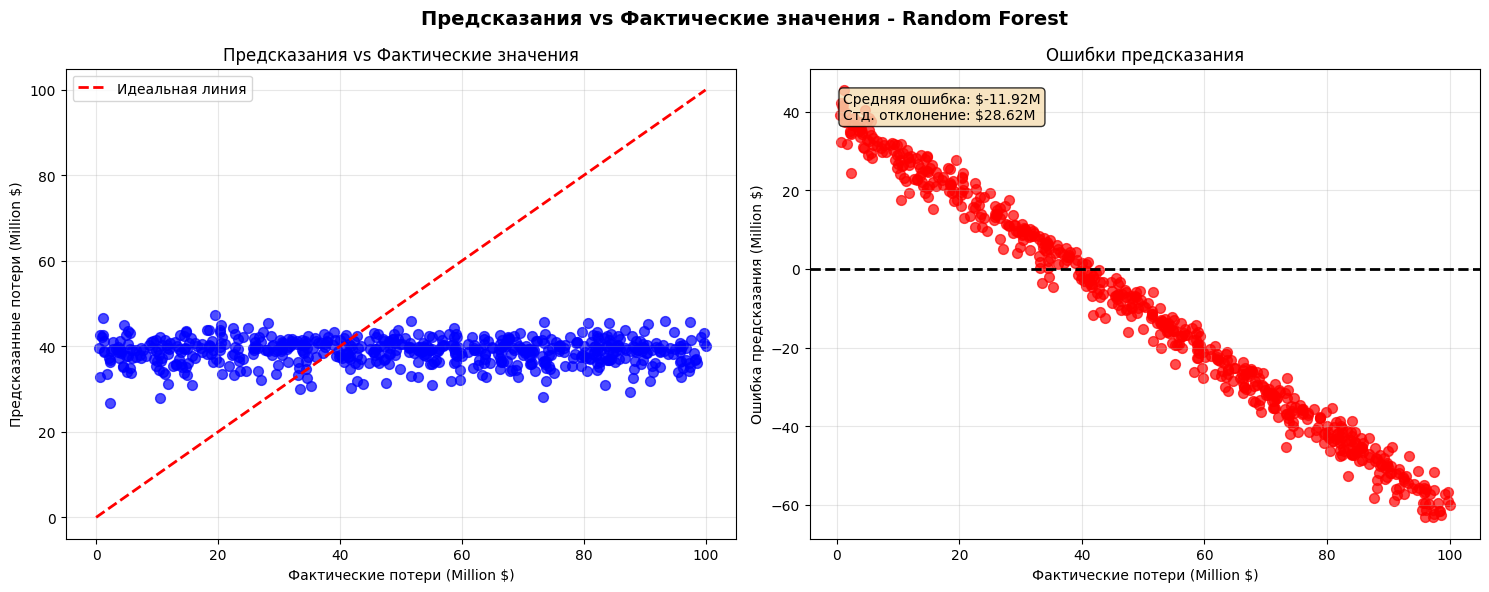


ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

🎯 Рекомендуемая модель: Random Forest
📊 Качество предсказания (R²): -0.1886
💰 Средняя абсолютная ошибка: $26.50M
📈 Средняя абсолютная процентная ошибка: 174.23%

🏅 Рейтинг моделей по R²:
  1. Random Forest: -0.1886
  2. CatBoost: -0.2222
  3. LightGBM: -0.2791
  4. XGBoost: -0.3040
  5. Gradient Boosting: -0.3076

💡 Модель готова для предсказания финансовых потерь от кибератак!


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Инициализация случайного seed для воспроизводимости
np.random.seed(42)

# ============================================================================
# ЗАГРУЗКА И АНАЛИЗ ДАННЫХ
# ============================================================================

print("=" * 60)
print("АНАЛИЗ ДАННЫХ КИБЕРАТАК")
print("=" * 60)

# Предположим, что данные в переменной 'threats'
data = threats.copy()

print(f"Размер датасета: {data.shape}")
print("\nПервые 5 строк:")
print(data.head())

print("\nТипы данных:")
print(data.dtypes)

# ============================================================================
# ПОДГОТОВКА ДАННЫХ (УПРОЩЕННАЯ ВЕРСИЯ)
# ============================================================================

print("\n" + "=" * 60)
print("ПОДГОТОВКА ДАННЫХ")
print("=" * 60)

# Убедимся, что целевая переменная числовая
data['Financial Loss (in Million $)'] = pd.to_numeric(data['Financial Loss (in Million $)'], errors='coerce')

# Определение признаков и целевой переменной
X = data.drop('Financial Loss (in Million $)', axis=1)
y = data['Financial Loss (in Million $)']

# Удаляем строки с пропусками в целевой переменной
mask = y.notna()
X = X[mask]
y = y[mask]

print(f"После очистки: {X.shape}")

# Простое логарифмическое преобразование
try:
    y_transformed = np.log1p(y)
    use_log_transform = True
    print("✅ Применено логарифмическое преобразование")
except Exception as e:
    y_transformed = y.copy()
    use_log_transform = False
    print(f"❌ Логарифмирование не применено: {e}")

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Определение типов признаков
categorical_features = ['Country', 'Attack Type', 'Target Industry',
                       'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']
numeric_features = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Убедимся, что числовые признаки действительно числовые
for col in numeric_features:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')

print(f"\nКатегориальные признаки: {categorical_features}")
print(f"Числовые признаки: {numeric_features}")

# Создание препроцессора
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

# ============================================================================
# ОПРЕДЕЛЕНИЕ МОДЕЛЕЙ И МЕТРИК
# ============================================================================

def calculate_mape(y_true, y_pred):
    """Расчет Mean Absolute Percentage Error"""
    # Защита от деления на ноль
    mask = y_true != 0
    if np.sum(mask) == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def evaluate_model(y_true, y_pred, model_name):
    """Оценка модели по всем метрикам"""
    if use_log_transform:
        y_true_orig = np.expm1(y_true)
        y_pred_orig = np.expm1(y_pred)
    else:
        y_true_orig = y_true
        y_pred_orig = y_pred

    metrics = {
        'MAE': mean_absolute_error(y_true_orig, y_pred_orig),
        'RMSE': np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)),
        'R2': r2_score(y_true_orig, y_pred_orig),
        'MAPE': calculate_mape(y_true_orig, y_pred_orig)
    }

    print(f"\n{model_name} Результаты:")
    print(f"  MAE: ${metrics['MAE']:.2f}M")
    print(f"  RMSE: ${metrics['RMSE']:.2f}M")
    print(f"  R²: {metrics['R2']:.4f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%")

    return metrics

# Определение моделей
print("\nИнициализация моделей...")

models = {
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100, random_state=42, max_depth=6, learning_rate=0.1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100, random_state=42, max_depth=6, learning_rate=0.1
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, random_state=42, max_depth=6
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=100, random_state=42, max_depth=6, verbose=-1, learning_rate=0.1
    ),
    'CatBoost': CatBoostRegressor(
        n_estimators=100, random_state=42, max_depth=6, verbose=False, learning_rate=0.1
    )
}

print(f"✅ Все 5 моделей инициализированы: {list(models.keys())}")

# ============================================================================
# ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ
# ============================================================================

print("\n" + "=" * 60)
print("ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ")
print("=" * 60)

results = {}

for name, model in models.items():
    print(f"\n--- Обучение {name} ---")

    try:
        # Создание пайплайна
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Обучение модели
        pipeline.fit(X_train, y_train)

        # Предсказание
        y_pred = pipeline.predict(X_test)

        # Оценка
        metrics = evaluate_model(y_test, y_pred, name)

        # Сохранение результатов
        results[name] = {
            'pipeline': pipeline,
            'predictions': y_pred,
            'metrics': metrics
        }

        print(f"✅ {name} успешно обучена")

    except Exception as e:
        print(f"❌ Ошибка при обучении {name}: {e}")
        continue

# Проверяем, что хотя бы одна модель обучилась успешно
if not results:
    print("Ни одна модель не была успешно обучена! Проверьте данные.")
    exit()

print(f"\n✅ Успешно обучено моделей: {len(results)} из {len(models)}")

# ============================================================================
# СРАВНЕНИЕ МОДЕЛЕЙ
# ============================================================================

print("\n" + "=" * 60)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ")
print("=" * 60)

# Создание DataFrame с результатами
results_df = pd.DataFrame({
    model: results[model]['metrics'] for model in results.keys()
}).T

print("\nСравнительная таблица метрик:")
print(results_df.round(4))

# Определение лучшей модели по R²
best_model_name = results_df['R2'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"\n{'='*50}")
print(f"🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"{'='*50}")
print(f"R²: {best_model_metrics['R2']:.4f}")
print(f"MAE: ${best_model_metrics['MAE']:.2f}M")
print(f"RMSE: ${best_model_metrics['RMSE']:.2f}M")
print(f"MAPE: {best_model_metrics['MAPE']:.2f}%")

# ============================================================================
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
# ============================================================================

def plot_model_comparison(results_df):
    """Визуализация сравнения моделей"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Сравнение производительности моделей', fontsize=16, fontweight='bold')

    models_list = results_df.index
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'][:len(models_list)]

    # 1. Сравнение R²
    r2_scores = results_df['R2']
    bars1 = axes[0, 0].bar(models_list, r2_scores, color=colors)
    axes[0, 0].set_title('Сравнение R² (чем больше → тем лучше)')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].tick_params(axis='x', rotation=45)
    for bar, value in zip(bars1, r2_scores):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. Сравнение MAE
    mae_scores = results_df['MAE']
    bars2 = axes[0, 1].bar(models_list, mae_scores, color=colors)
    axes[0, 1].set_title('Сравнение MAE (чем меньше → тем лучше)')
    axes[0, 1].set_ylabel('MAE (Million $)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    for bar, value in zip(bars2, mae_scores):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mae_scores)*0.01,
                       f'${value:.2f}M', ha='center', va='bottom', fontweight='bold')

    # 3. Сравнение RMSE
    rmse_scores = results_df['RMSE']
    bars3 = axes[1, 0].bar(models_list, rmse_scores, color=colors)
    axes[1, 0].set_title('Сравнение RMSE (чем меньше → тем лучше)')
    axes[1, 0].set_ylabel('RMSE (Million $)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    for bar, value in zip(bars3, rmse_scores):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(rmse_scores)*0.01,
                       f'${value:.2f}M', ha='center', va='bottom', fontweight='bold')

    # 4. Сравнение MAPE
    mape_scores = results_df['MAPE']
    bars4 = axes[1, 1].bar(models_list, mape_scores, color=colors)
    axes[1, 1].set_title('Сравнение MAPE (чем меньше → тем лучше)')
    axes[1, 1].set_ylabel('MAPE (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    for bar, value in zip(bars4, mape_scores):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mape_scores)*0.01,
                       f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def plot_predictions_vs_actual(best_model_name, results, y_test):
    """Визуализация предсказаний лучшей модели"""

    best_predictions = results[best_model_name]['predictions']

    if use_log_transform:
        y_test_orig = np.expm1(y_test)
        best_predictions_orig = np.expm1(best_predictions)
    else:
        y_test_orig = y_test
        best_predictions_orig = best_predictions

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Предсказания vs Фактические значения - {best_model_name}', fontsize=14, fontweight='bold')

    # 1. Scatter plot предсказаний vs фактических значений
    axes[0].scatter(y_test_orig, best_predictions_orig, alpha=0.7, color='blue', s=50)
    max_val = max(y_test_orig.max(), best_predictions_orig.max())
    axes[0].plot([0, max_val], [0, max_val], 'r--', lw=2, label='Идеальная линия')
    axes[0].set_xlabel('Фактические потери (Million $)')
    axes[0].set_ylabel('Предсказанные потери (Million $)')
    axes[0].set_title('Предсказания vs Фактические значения')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 2. Ошибки предсказания
    errors = best_predictions_orig - y_test_orig
    axes[1].scatter(y_test_orig, errors, alpha=0.7, color='red', s=50)
    axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axes[1].set_xlabel('Фактические потери (Million $)')
    axes[1].set_ylabel('Ошибка предсказания (Million $)')
    axes[1].set_title('Ошибки предсказания')
    axes[1].grid(True, alpha=0.3)

    # Добавляем статистику ошибок
    avg_error = np.mean(errors)
    std_error = np.std(errors)
    axes[1].text(0.05, 0.95, f'Средняя ошибка: ${avg_error:.2f}M\nСтд. отклонение: ${std_error:.2f}M',
                transform=axes[1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Визуализация результатов
print("\nВизуализация результатов...")
plot_model_comparison(results_df)
plot_predictions_vs_actual(best_model_name, results, y_test)

# ============================================================================
# ФИНАЛЬНЫЕ ВЫВОДЫ
# ============================================================================

print("\n" + "=" * 60)
print("ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 60)

print(f"\n🎯 Рекомендуемая модель: {best_model_name}")
print(f"📊 Качество предсказания (R²): {best_model_metrics['R2']:.4f}")
print(f"💰 Средняя абсолютная ошибка: ${best_model_metrics['MAE']:.2f}M")
print(f"📈 Средняя абсолютная процентная ошибка: {best_model_metrics['MAPE']:.2f}%")

# Рейтинг моделей
print(f"\n🏅 Рейтинг моделей по R²:")
sorted_models = results_df['R2'].sort_values(ascending=False)
for i, (model, score) in enumerate(sorted_models.items(), 1):
    print(f"  {i}. {model}: {score:.4f}")

print(f"\n💡 Модель готова для предсказания финансовых потерь от кибератак!")